<a href="https://colab.research.google.com/github/RickyMacharm/plotting/blob/master/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###First Time Run
Run his cell only if you are running this notebook for the very first time on colab or on a new `Google` account. If the cell is commented, Higlight the contents and use a combination of `'ctrl'` plus `'/'` keys to uncomment the cell.

Click on the url given:( `Go to this URL in a browser: https://accounts.google.com/o/oauth2/XXXXX.....`) after you run the cell and choose the `Google` account you intend to use for running colab and get the authorization code generated.

In [0]:
# from fastai.basics import *
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'matplotlib/'

# path = Path(base_dir)

# path.mkdir(parents=True, exist_ok=True)


# import os
# os.chdir(path)

### Next Time Run
If you have ran this notebook on colab on the same Google account before now and all the folders have been created, you can run this cell after the first runtime has expired. Colab as of 2019 only allows `12` hours of free runtime before resetting.

If the cell is commented, Higlight the contents and use a combination of `'ctrl'` plus `'/'` keys to uncomment the cell.

Click on the url given:( `Go to this URL in a browser: https://accounts.google.com/o/oauth2/XXXXX.....`) after you run the cell and choose the `Google` account you intend to use for running colab and get the authorization code generated.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# from fastai.basics import *
# path = Path('/content/drive/My Drive/matplotlib/')

# #we want to change the present working directory to that of path assigned above.
# import os
# os.chdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Effectively Using Matplotlib

Full article on [pbpython.com](http://pbpython.com/effective-matplotlib.html).
What I did was to play around with it and add a few more lines of explanation of mine. Any errors herein are mine. You should do yourself a favor and go to the original source and compare.

### **Thank You!**

### **A note on the Object-Oriented API vs Pyplot**
Matplotlib has two interfaces. The first is an object-oriented (OO) interface. In this case, we utilize an instance of `axes.Axes` in order to render visualizations on an instance of `figure.Figure`.

The second is based on MATLAB and uses a state-based interface. This is encapsulated in the `pyplot` module. See the pyplot tutorials for a more in-depth look at the pyplot interface.

Most of the terms are straightforward but the main thing to remember is that:

  1.The Figure is the final image that may contain 1 or more Axes.

  2.The Axes represent an individual plot (don't confuse this with the word "axis", which refers to the x/y axis of a plot).

We call methods that do the plotting directly from the Axes, which gives us much more flexibility and power in customizing our plot.

We will use the Object-Oriented approach over that of the `pyplot` inerface here.

In [0]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [0]:
# Ensure plots are displayed inline
%matplotlib inline
#%matplotlib notebook

I have forked the original github repo into mine. So I will now be donloading from my own repo instead of the original.

In [0]:
df = pd.read_excel('https://github.com/RickyMacharm/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true')

I want to see how the original data looks.

In [6]:
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


We are goint to use the `groupby()` function to help to summarize the data by customers. The `agg()` will do a couple of things for us: `'ext price': 'sum'` will sum up the `ext price` based on the groups we are creating and the `'quantity': 'count'` will count the number of occurrences of the entries under 'quantity' based on the groups (in our case the companies we are dealing with). We would then arrange (`sort_values()`) our new dataframe in descending order (`ascending=False`).

In [11]:
customers = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))
customers

,ext price,quantity
name,,
Kulas Inc,137351.96,94
White-Trantow,135841.99,86
Trantow-Barrows,123381.38,94
Jerde-Hilpert,112591.43,89
"Fritsch, Russel and Anderson",112214.71,81
Barton LLC,109438.50,82
Will LLC,104437.60,74
Koepp Ltd,103660.54,82
"Frami, Hills and Schmidt",103569.59,72


we would have to use the `reset_index` method because we do not want to use the names of the companies as indexes. We make sure we include the attribute `inplace=True`

In [12]:
customers.reset_index(inplace=True)
customers

,name,ext price,quantity
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


we have 20 customer names.

let us start by cleaning up the column names for consistency.

In [13]:
customers.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

customers

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


Matplotlib has so many styles. let us look at available styles and also count how many they are.

In [14]:
styles = plt.style.available
print(styles)
len(styles)

['seaborn-pastel', 'seaborn-notebook', 'seaborn-dark-palette', 'seaborn-deep', 'seaborn-muted', 'seaborn', 'seaborn-talk', 'seaborn-paper', 'seaborn-darkgrid', 'seaborn-bright', 'seaborn-poster', 'ggplot', 'tableau-colorblind10', '_classic_test', 'seaborn-colorblind', 'fast', 'grayscale', 'seaborn-whitegrid', 'Solarize_Light2', 'classic', 'seaborn-dark', 'bmh', 'seaborn-ticks', 'dark_background', 'seaborn-white', 'fivethirtyeight']


26

I will choose `'fivethirtyeight'` because it is easier to print this. We can play around with others too!

I will now activate my choice.

In [0]:
plt.style.use('fivethirtyeight')

### Getting started with `Matplotlib`
This data is naturally visualized as a barplot, with one bar per group. To do this with the object-oriented approach, we'll first generate an instance of figure.Figure and `axes.Axes`. The Figure is like a canvas, and the Axes is a part of that canvas on which we will make a particular visualization.

**Note**
Figures can have multiple axes on them. For information on how to do this, see the [Tight Layout tutorial](https://matplotlib.org/tutorials/intermediate/tight_layout_guide.html).

Let us do a basic plot with no data.

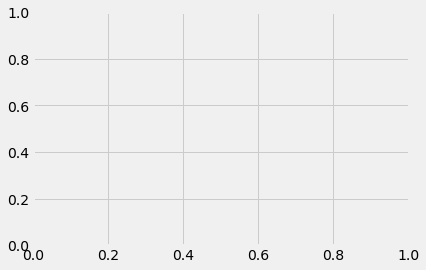

In [17]:
fig, ax = plt.subplots()

Now that we have an Axes instance, we can plot on top of it.

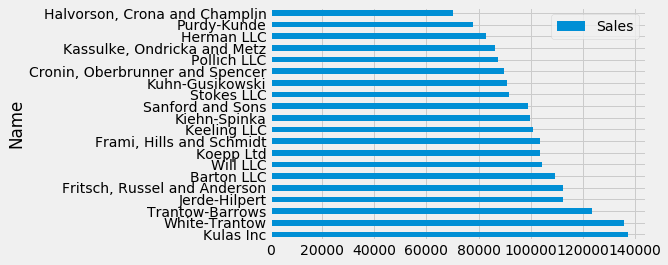

In [19]:
customers.plot(kind='barh', y="Sales", x="Name");

Get the figure and axes for future customization

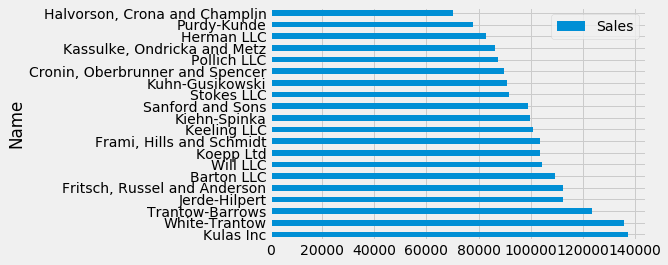

In [53]:
fig, ax = plt.subplots()
customers.plot(kind='barh', y="Sales", x="Name", ax=ax);

Set some limits and labels

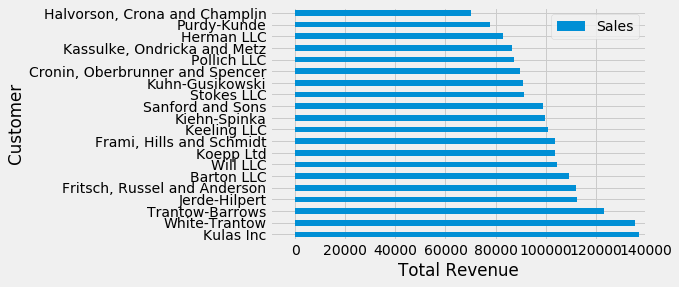

In [20]:
fig, ax = plt.subplots()
customers.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer');

Alternative api using `ax.set` which looks shorter.

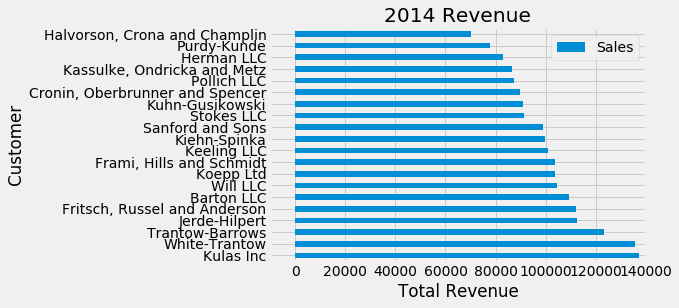

In [21]:
fig, ax = plt.subplots()
customers.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer');

We will hide the legend since it is not useful in this case using `ax.legend().set_visible(False)`. Also change the size of the image using `plt.subplots(figsize=(5, 6))`.

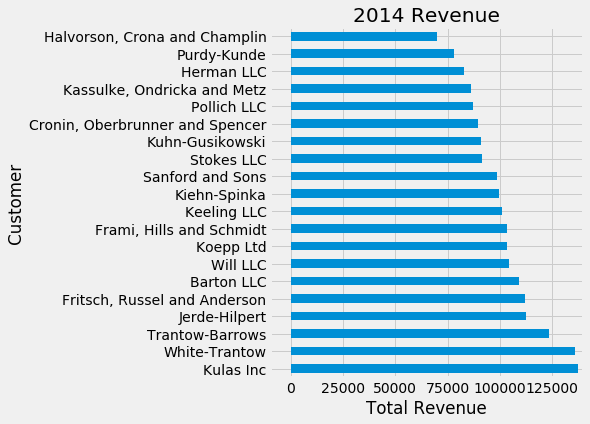

In [25]:
fig, ax = plt.subplots(figsize=(5, 6))
customers.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
ax.legend().set_visible(False)

Add some annotations, and turn off the grid (`ax.grid(False)`) - just to show how it is done.

We mark the horizontal bars using the average of the `Total Revenue` column.

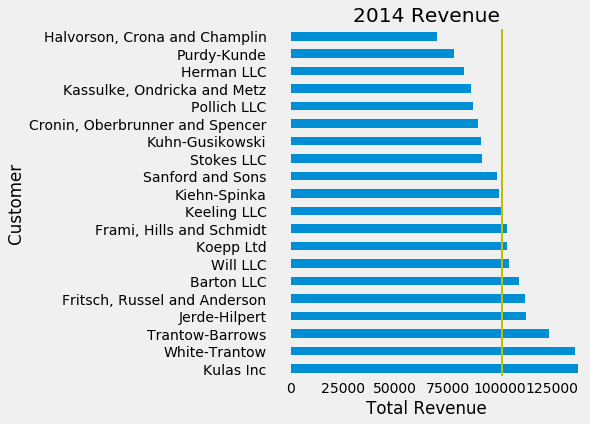

In [54]:
fig, ax = plt.subplots(figsize=(5, 6))
customers.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = customers['Sales'].mean()
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
ax.axvline(x=avg, color='y', label='Average', linestyle='-', linewidth=2)
ax.grid(False)
ax.legend().set_visible(False)

To clean up the currency in Total Revenue, we define a custom formatting function

In [0]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

Use the new formatter

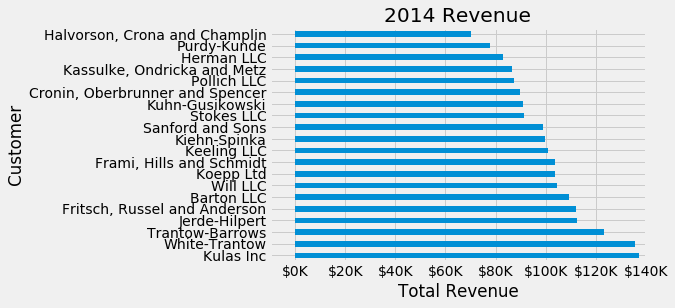

In [32]:
fig, ax = plt.subplots()
customers.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

Fully commented example

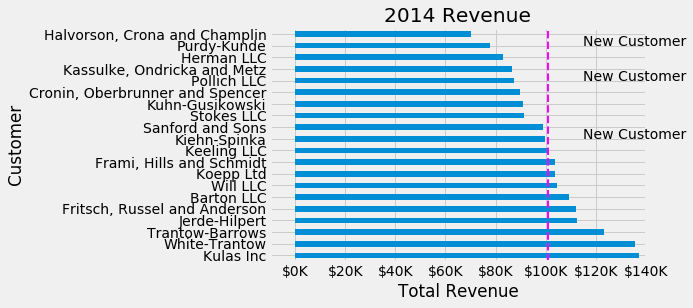

In [55]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
customers.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = customers['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='magenta', label='Average', linestyle='--', linewidth=2)

# Annotate the new customers
for cust in [10, 15, 18]:
    ax.text(115000, cust, "New Customer") #we randomly selected these guys
    
# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False);

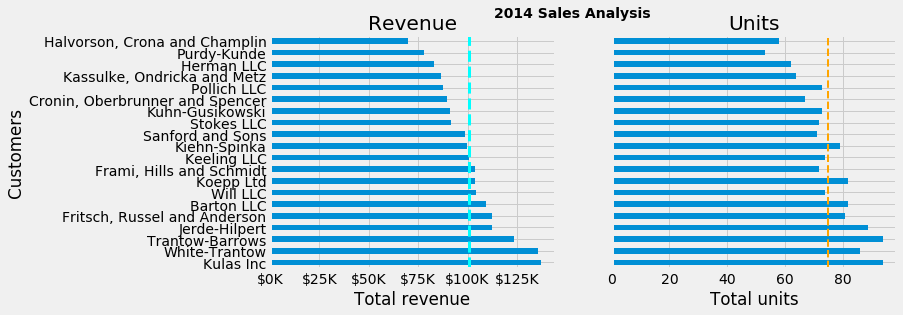

In [49]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4))

# Build the first plot
customers.plot(kind='barh', x='Name', y='Sales', ax=ax0)
ax0.set(title='Revenue', xlabel='Total revenue', ylabel='Customers')
formatter = FuncFormatter(currency)
ax0.xaxis.set_major_formatter(formatter)

# Add average line to the first plot
revenue_average = customers['Sales'].mean()
ax0.axvline(x=revenue_average, color='cyan', label='Average', linestyle='--', linewidth=3)

# Build the second plot
customers.plot(kind='barh', x='Name', y='Purchases', ax=ax1)
ax1.set(title='Units', xlabel='Total units', ylabel='')

# Add average line to the second plot
purchases_average = customers['Purchases'].mean()
ax1.axvline(x=purchases_average, color='orange', label='Average', linestyle='--', linewidth=2)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold')

# Hide the plot legends
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

Save some files

In [43]:
# Let's look at how to save the files
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [0]:
fig.savefig('sales.jpg', transparent=False, dpi=80, bbox_inches="tight")

we will check the local folder to see what we have saved

In [51]:
!ls

drive  sales.jpg  sample_data


We can see a file named as `sales.jpg` in the folder. Let us display the file to see what it looks like

In [0]:
from IPython.display import Image

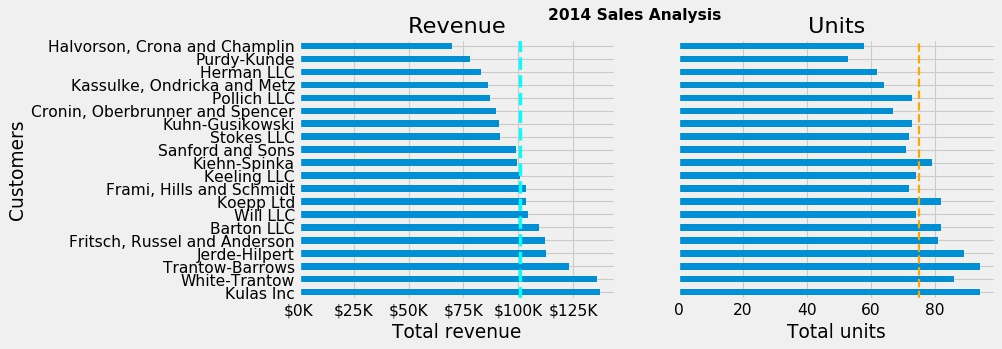

In [52]:
Image('sales.jpg')